### Importação dos dados



In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
# Resumo das bases de deados
loja1.info()
loja2.info()
loja3.info()
loja4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

In [5]:
# Anlise de valores ausentes
loja1.isnull().sum()
loja2.isnull().sum()
loja3.isnull().sum()
loja4.isnull().sum()


,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


#1. Análise do faturamento


In [89]:
# Analise do faturamento de cada loja
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento_total = []
faturamento_rede = 0

for i, loja in enumerate(lojas, start=1):
    # faturamento = loja['Preço'] + loja['Frete']
    faturamento_loja = loja['Preço'].sum()
    faturamento_total.append(faturamento_loja)
    faturamento_rede += faturamento_loja
    print(f"Faturamento da loja {i}: R$ {faturamento_loja:.2f}")

print(f"\nFaturamento Total da rede R$ {faturamento_rede:.2f}")

Faturamento da loja 1: R$ 1534509.12
Faturamento da loja 2: R$ 1488459.06
Faturamento da loja 3: R$ 1464025.03
Faturamento da loja 4: R$ 1384497.58

Faturamento Total da rede R$ 5871490.79


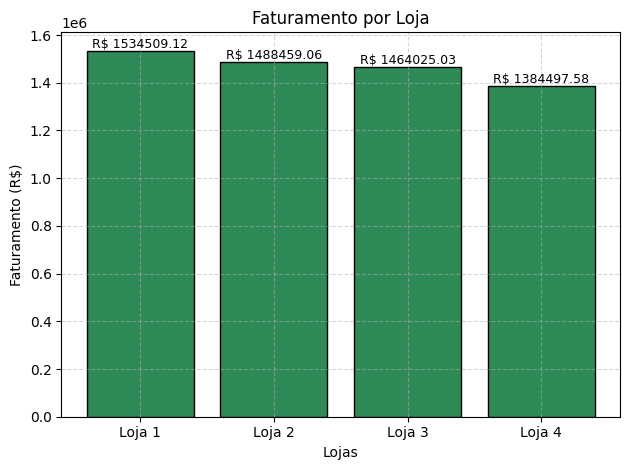

In [91]:
# Gráfico de barras
plt.bar(nomes_lojas, faturamento_total, color='seagreen', edgecolor='black')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento por Loja')
plt.grid(True, linestyle='--', alpha=0.5)

for i, valor in enumerate(faturamento_total):
    plt.text(i, valor, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [96]:
# Calculo de vendas por categoria
for i, loja in enumerate(lojas, start=1):
    print(f"\nVendas por categoria - Loja {i}:")
    vendas_categoria = loja.groupby('Categoria do Produto')['Preço'].sum()
    print(vendas_categoria)


Vendas por categoria - Loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria - Loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria - Loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis         

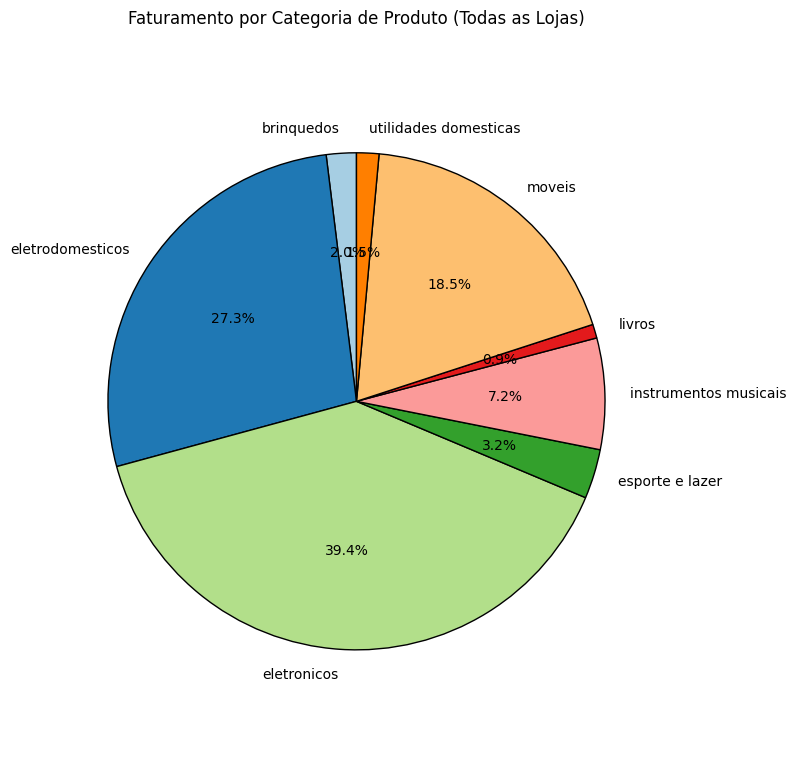

In [98]:
categorias = vendas_categoria.index
valores = vendas_categoria.values

plt.figure(figsize=(8, 8))
plt.pie(
    valores,
    labels=categorias,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Faturamento por Categoria de Produto (Todas as Lojas)")
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [60]:
avaliacoes = []
for i, loja in enumerate(lojas, start=1):
    media_avaliacoes = loja['Avaliação da compra'].mean()
    avaliacoes.append(media_avaliacoes)
    print(f"Média de avaliações - Loja {i}: {media_avaliacoes:.2f}")

Média de avaliações - Loja 1: 3.98
Média de avaliações - Loja 2: 4.04
Média de avaliações - Loja 3: 4.05
Média de avaliações - Loja 4: 4.00


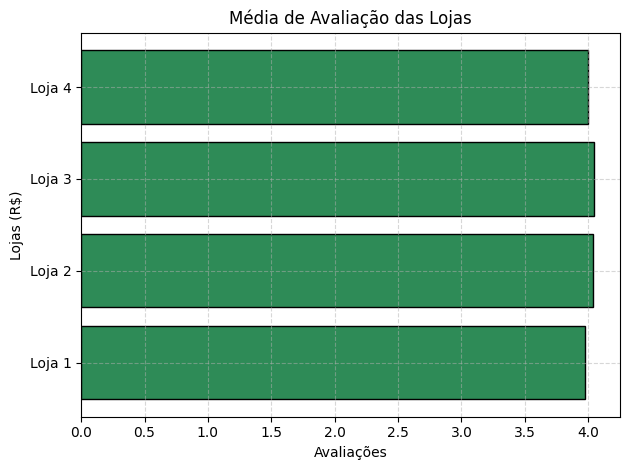

In [92]:
plt.barh(nomes_lojas, avaliacoes, color='seagreen', edgecolor='black')
plt.xlabel('Avaliações')
plt.ylabel('Lojas (R$)')
plt.title('Média de Avaliação das Lojas')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [88]:
for i, loja in enumerate(lojas, start=1):
    produtos_vendidos = loja['Produto'].value_counts()
    # Ordenar do mais vendido para o menos vendido
    produtos_vendidos = produtos_vendidos.sort_values(ascending=False)
print(f'Produtos mais vendidos {produtos_vendidos.head()}')


Produtos mais vendidos Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Name: count, dtype: int64


In [87]:
print(f'\nProdutos menos vendidos\n:  {produtos_vendidos.tail()}')


Produtos menos vendidos
:  Produto
Geladeira                      38
Ciência de dados com python    38
Violão                         37
Guarda roupas                  34
Guitarra                       33
Name: count, dtype: int64


# 5. Frete Médio por Loja


In [85]:
fretes_medios = []

for i, loja in enumerate(lojas, start=1):
    frete_medio = loja['Frete'].mean()
    print(f"Frete médio da Loja {i}: R$ {frete_medio:.2f}")


Frete médio da Loja 1: R$ 34.69
Frete médio da Loja 2: R$ 33.62
Frete médio da Loja 3: R$ 33.07
Frete médio da Loja 4: R$ 31.28


# 6. Resultado

### Com base na analise efetuado, podemos concluir que:
- Loja que apresentou faturamento mais baixo: **Loja 4**
- Pior avaliação: **Loja 1** (3.98), mas só por uma diferença mínima.
- Frete mais barato: **Loja 4** — ponto positivo nesse quesito.

### Possível decisão:
- Levando em consideração apenas os valores quantitativos a **Loja 4** apresenta o  pior desempenho, com o menor faturamento e a segunda pior avaliação.

- Logo, a **Loja 4** seria a candidata mais lógica para encerramento de suas atividades.






